In [61]:
# 导入相关数据包
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
from scipy import stats
from scipy.stats import norm

In [63]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [64]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [65]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [67]:
# 相关性协方差表,corr()函数,返回结果接近0说明无相关性,大于0说明是正相关,小于0是负相关.
train_corr = train.drop('Id',axis=1).corr()
train_corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


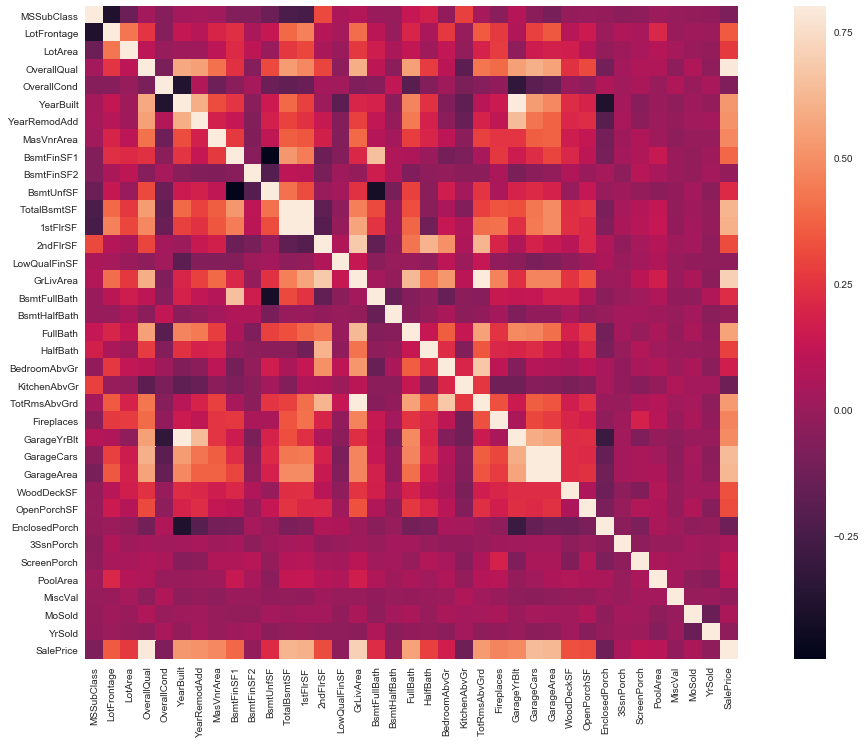

In [68]:
# 画出相关性热力图
a = plt.subplots(figsize=(20, 12))#调整画布大小
a = sns.heatmap(train_corr, vmax=.8, square=True)#画热力图   annot=True 显示系数

In [69]:
# 寻找K个最相关的特征信息
k = 10 # number of variables for heatmap
cols = train_corr.nlargest(k, 'SalePrice')['SalePrice'].index
print(cols)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


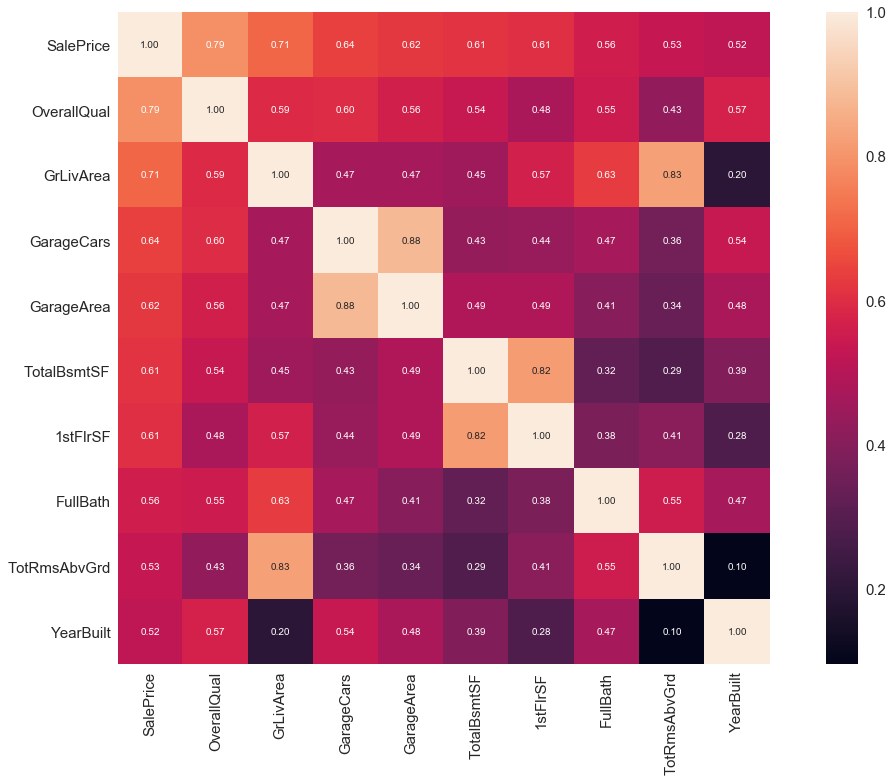

In [70]:
cm = np.corrcoef(train[cols].values.T)
#print(cm)
sns.set(font_scale=1.5)
hm = plt.subplots(figsize=(20, 12))#调整画布大小
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

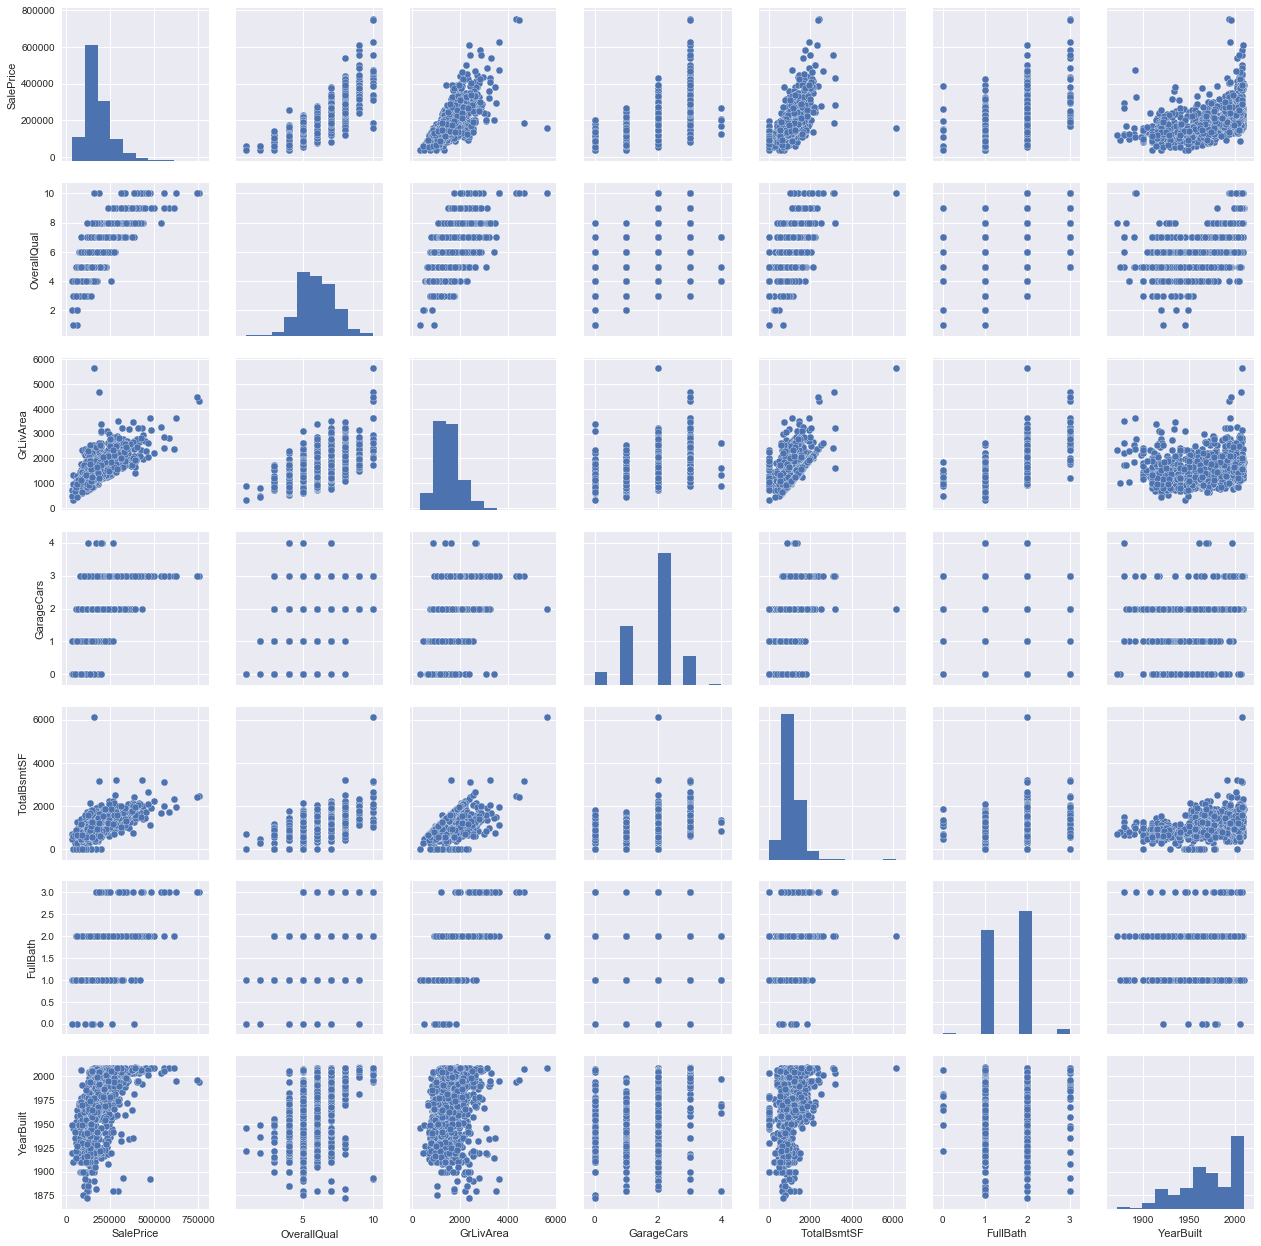

In [71]:
#SalePrice 和相关变量之间的散点图
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

In [72]:
train[['SalePrice', 'OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
SalePrice      1460 non-null int64
OverallQual    1460 non-null int64
GrLivArea      1460 non-null int64
GarageCars     1460 non-null int64
TotalBsmtSF    1460 non-null int64
FullBath       1460 non-null int64
YearBuilt      1460 non-null int64
dtypes: int64(7)
memory usage: 79.9 KB


In [73]:
total= train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Lost Percent'])
missing_data.head(20)

,Total,Lost Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [74]:
'''
1. 对于缺失率过高的特征，例如 超过15% 我们应该删掉相关变量且假设该变量并不存在
2. GarageX 变量群的缺失数据量和概率都相同，可以选择一个就行，例如：GarageCars
3. 对于缺失数据在5%左右（缺失率低），可以直接删除/回归预测
'''
train= train.drop((missing_data[missing_data['Total'] > 1]).index, axis=1)
train= train.drop(train.loc[train['Electrical'].isnull()].index)
train.isnull().sum().max() #justchecking that there's no missing data missing

0

'\n从直方图中可以看出：\n\n* 偏离正态分布\n* 数据正偏\n* 有峰值\n'

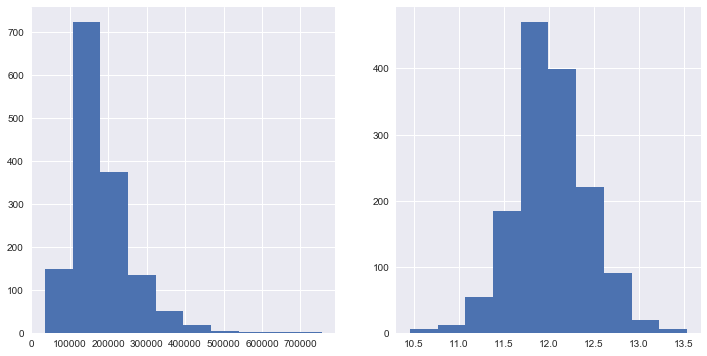

In [75]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.hist(train.SalePrice)
ax2.hist(np.log1p(train.SalePrice))

'''
从直方图中可以看出：

* 偏离正态分布
* 数据正偏
* 有峰值
'''

In [76]:
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

'''
低范围的值都比较相似并且在 0 附近分布。
高范围的值离 0 很远，并且七点几的值远在正常范围之外。
'''

Skewness: 1.881943
Kurtosis: 6.529263


'\n低范围的值都比较相似并且在 0 附近分布。\n高范围的值离 0 很远，并且七点几的值远在正常范围之外。\n'

'\n从图中可以看出：\n\n1. 有两个离群的 GrLivArea 值很高的数据，我们可以推测出现这种情况的原因。\n    或许他们代表了农业地区，也就解释了低价。 这两个点很明显不能代表典型样例，所以我们将它们定义为异常值并删除。\n2. 图中顶部的两个点是七点几的观测值，他们虽然看起来像特殊情况，但是他们依然符合整体趋势，所以我们将其保留下来。\n'

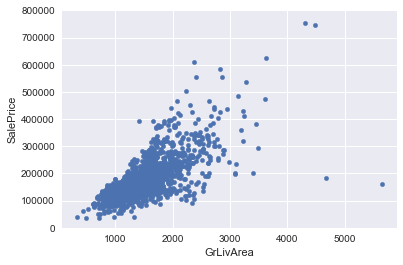

In [77]:
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

'''
从图中可以看出：

1. 有两个离群的 GrLivArea 值很高的数据，我们可以推测出现这种情况的原因。
    或许他们代表了农业地区，也就解释了低价。 这两个点很明显不能代表典型样例，所以我们将它们定义为异常值并删除。
2. 图中顶部的两个点是七点几的观测值，他们虽然看起来像特殊情况，但是他们依然符合整体趋势，所以我们将其保留下来。
'''

In [78]:
# 删除点
train.sort_values(by = 'GrLivArea',ascending = False)[:2]


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [79]:
train = train.drop(train[train['Id'] == 1183].index)
train = train.drop(train[train['Id'] == 694].index)

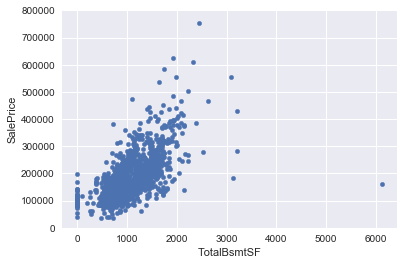

In [80]:
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'],train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice',ylim=(0,800000));

'\n可以看出，房价分布不是正态的，显示了峰值，正偏度，但是并不跟随对角线。\n可以用对数变换来解决这个问题\n'

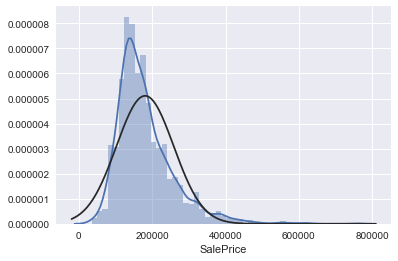

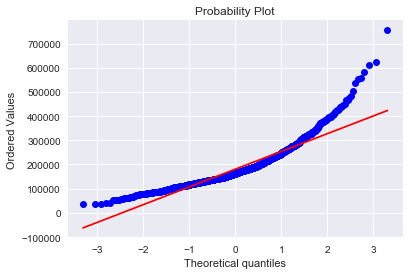

In [81]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

'''
可以看出，房价分布不是正态的，显示了峰值，正偏度，但是并不跟随对角线。
可以用对数变换来解决这个问题
'''

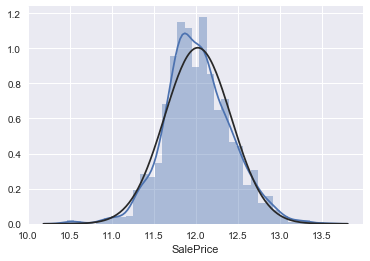

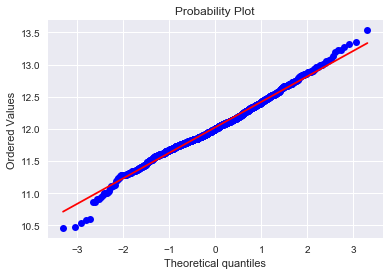

In [82]:
# 进行对数变换：
train['SalePrice']= np.log(train['SalePrice'])
# 绘制变换后的直方图和正态概率图：

sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

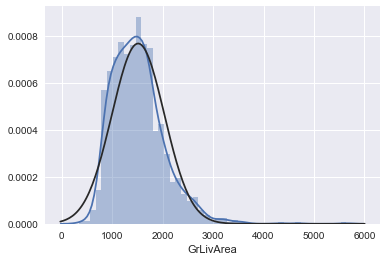

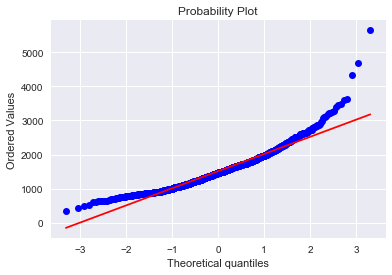

In [83]:
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

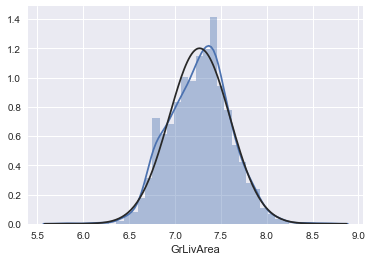

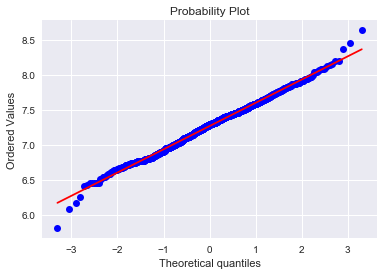

In [84]:
# 进行对数变换：
train['GrLivArea']= np.log(train['GrLivArea'])

# 绘制变换后的直方图和正态概率图：
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

'\n从图中可以看出：\n* 显示出了偏度\n* 大量为 0(Y值) 的观察值（没有地下室的房屋）\n* 含 0(Y值) 的数据无法进行对数变换\n'

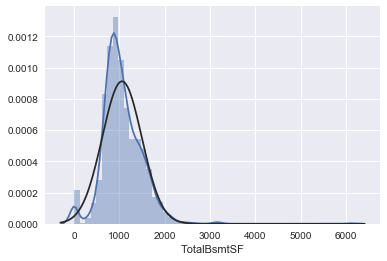

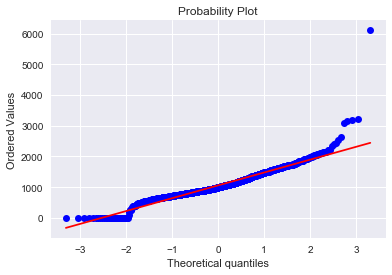

In [85]:
sns.distplot(train['TotalBsmtSF'],fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'],plot=plt)

'''
从图中可以看出：
* 显示出了偏度
* 大量为 0(Y值) 的观察值（没有地下室的房屋）
* 含 0(Y值) 的数据无法进行对数变换
'''

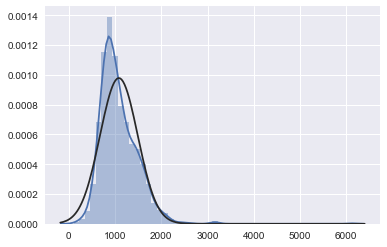

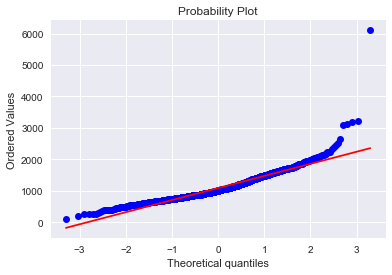

In [86]:
# 去掉为0的分布情况
tmp = np.array(train.loc[train['TotalBsmtSF']>0, ['TotalBsmtSF']])[:, 0]
sns.distplot(tmp,fit=norm);
fig = plt.figure()
res = stats.probplot(tmp,plot=plt)

In [87]:
# 我们建立了一个变量，可以得到有没有地下室的影响值（二值变量），我们选择忽略零值，只对非零值进行对数变换。
# 这样我们既可以变换数据，也不会损失有没有地下室的影响。

print(train.loc[train['TotalBsmtSF']==0, ['TotalBsmtSF']].count())
train.loc[train['TotalBsmtSF']==0,'TotalBsmtSF'] = 1
print(train.loc[train['TotalBsmtSF']==1, ['TotalBsmtSF']].count())

TotalBsmtSF    37
dtype: int64
TotalBsmtSF    37
dtype: int64


In [88]:
# 进行对数变换：
print(train['TotalBsmtSF'].head(20))
train['TotalBsmtSF']= np.log(train['TotalBsmtSF'])
print(train['TotalBsmtSF'].head(20))

0      856
1     1262
2      920
3      756
4     1145
5      796
6     1686
7     1107
8      952
9      991
10    1040
11    1175
12     912
13    1494
14    1253
15     832
16    1004
17       1
18    1114
19    1029
Name: TotalBsmtSF, dtype: int64
0     6.752270
1     7.140453
2     6.824374
3     6.628041
4     7.043160
5     6.679599
6     7.430114
7     7.009409
8     6.858565
9     6.898715
10    6.946976
11    7.069023
12    6.815640
13    7.309212
14    7.133296
15    6.723832
16    6.911747
17    0.000000
18    7.015712
19    6.936343
Name: TotalBsmtSF, dtype: float64


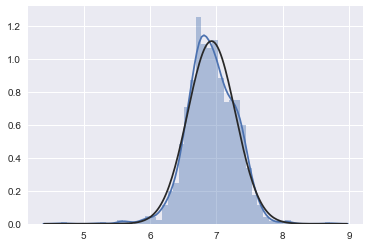

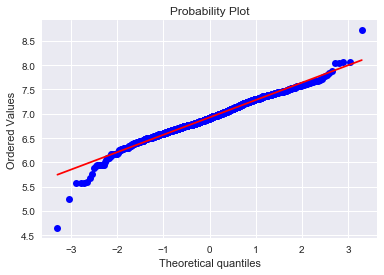

In [89]:
# 绘制变换后的直方图和正态概率图：

tmp = np.array(train.loc[train['TotalBsmtSF']>0, ['TotalBsmtSF']])[:, 0]
sns.distplot(tmp, fit=norm)
fig = plt.figure()
res = stats.probplot(tmp, plot=plt)

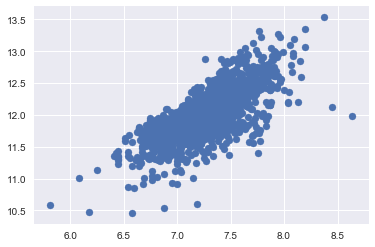

In [90]:
plt.scatter(train['GrLivArea'], train['SalePrice'])

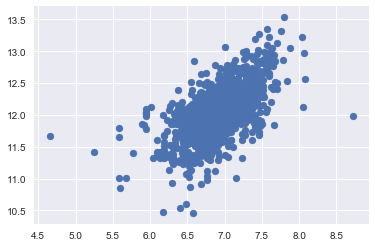

In [91]:
plt.scatter(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], train[train['TotalBsmtSF']>0]['SalePrice'])

In [92]:
x_train = train[['OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]
y_train = train[["SalePrice"]].values.ravel()
x_test = test[['OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]
for col in ('OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt'):
    test[col] = test[col].fillna(0)
# from sklearn.preprocessing import RobustScaler
# N = RobustScaler()
# rs_train = N.fit_transform(train)
# rs_test = N.fit_transform(train)

In [93]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

In [94]:
ridge = Ridge(alpha = 15)
# bagging 把很多小的分类器放在一起，每个train随机的一部分数据，然后把它们的最终结果综合起来（多数投票）
# bagging 算是一种算法框架
params = [1,10,15,20,25,30,40]
test_scores = []
for param in params:
    clf = BaggingRegressor(base_estimator=ridge, n_estimators=param)
    # cv=5表示cross_val_score采用的是k-fold cross validation的方法，重复5次交叉验证
    # scoring='precision'、scoring='recall'、scoring='f1', scoring='neg_mean_squared_error' 方差值
    test_score = np.sqrt(-cross_val_score(clf, x_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

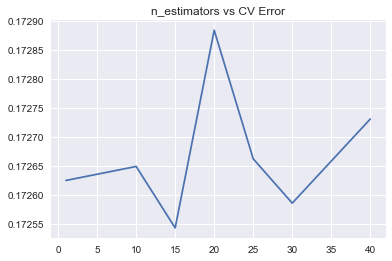

In [95]:
plt.plot(params, test_scores)
plt.title('n_estimators vs CV Error')
plt.show()

In [96]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import learning_curve

ridge = Ridge(alpha = 15)

train_sizes, train_loss, test_loss = learning_curve(ridge, x_train, y_train, cv=10, 
                                                    scoring='neg_mean_squared_error',
                                                    train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9 , 0.95, 1])

In [97]:
# 训练误差均值
train_loss_mean = -np.mean(train_loss, axis = 1)
# 测试误差均值
test_loss_mean = -np.mean(test_loss, axis = 1)

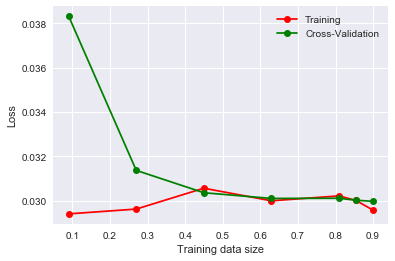

In [98]:
# 绘制误差曲线
plt.plot(train_sizes/len(x_train), train_loss_mean, 'o-', color = 'r', label = 'Training')
plt.plot(train_sizes/len(x_train), test_loss_mean, 'o-', color = 'g', label = 'Cross-Validation')

plt.xlabel('Training data size')
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.show()

In [99]:
mode_br = BaggingRegressor(base_estimator=ridge, n_estimators=25)
mode_br.fit(x_train, y_train)
x_test.head()
#y_test = np.expm1(mode_br.predict(x_test))
y_test = mode_br.predict(x_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').